selected_features = ["avg_cur_bal", "out_prncp", "total_rec_prncp", "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER", "home_ownership_OWN", "home_ownership_RENT", "fico_range_high", "fico_range_low", 'issue_d_ordinal', 'inq_last_12m', 'total_cu_tl', 
                    "inq_fi", "all_util", "max_bal_bc", "open_rv_24m", "open_rv_12m", "total_bal_il", "mths_since_rcnt_il", "open_il_24m", "open_il_12m", "open_act_il", "il_util", "open_acc_6m"]
include missing value near 30% features 

In [1]:
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# Load dataset
with open("train_val_test.pkl", "rb") as f:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(f)

print("Data successfully loaded!")


Data successfully loaded!


In [2]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=len(y_train.unique()),  # Number of unique classes
    tree_method="hist",  # Faster training
    enable_categorical=True,  # Use categorical support
    #use_label_encoder=False,
    eval_metric="auc",  # Move eval_metric here
    learning_rate=0.05,  # Lower learning rate
    #n_estimators=500,  # Reduce number of trees
    max_depth=4,  # Reduce tree depth
    subsample=0.8,  # Reduce overfitting
    #colsample_bytree=0.8,  # Use only 80% of features per tree
    alpha=15.0  # Add L1 regularization
)

# Train the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    #early_stopping_rounds=30, 
    verbose=True
)

print("Model training complete.")

[0]	validation_0-auc:0.91779
[1]	validation_0-auc:0.91871
[2]	validation_0-auc:0.91888
[3]	validation_0-auc:0.91997
[4]	validation_0-auc:0.92134
[5]	validation_0-auc:0.92171
[6]	validation_0-auc:0.92838
[7]	validation_0-auc:0.92906
[8]	validation_0-auc:0.92881
[9]	validation_0-auc:0.93093
[10]	validation_0-auc:0.93105
[11]	validation_0-auc:0.93109
[12]	validation_0-auc:0.93123
[13]	validation_0-auc:0.93279
[14]	validation_0-auc:0.93289
[15]	validation_0-auc:0.93447
[16]	validation_0-auc:0.93447
[17]	validation_0-auc:0.93526
[18]	validation_0-auc:0.93560
[19]	validation_0-auc:0.93593
[20]	validation_0-auc:0.93581
[21]	validation_0-auc:0.93596
[22]	validation_0-auc:0.93583
[23]	validation_0-auc:0.93595
[24]	validation_0-auc:0.93660
[25]	validation_0-auc:0.93660
[26]	validation_0-auc:0.93676
[27]	validation_0-auc:0.93665
[28]	validation_0-auc:0.93676
[29]	validation_0-auc:0.93616
[30]	validation_0-auc:0.93616
[31]	validation_0-auc:0.93563
[32]	validation_0-auc:0.93565
[33]	validation_0-au

In [3]:
# Make predictions
# Get probability predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score for multi-class
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Test ROC AUC Score: {auc_score:.4f}")
# Compute Training ROC AUC
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training ROC AUC Score: {train_auc:.4f}")

Test ROC AUC Score: 0.9397
Training ROC AUC Score: 0.9419


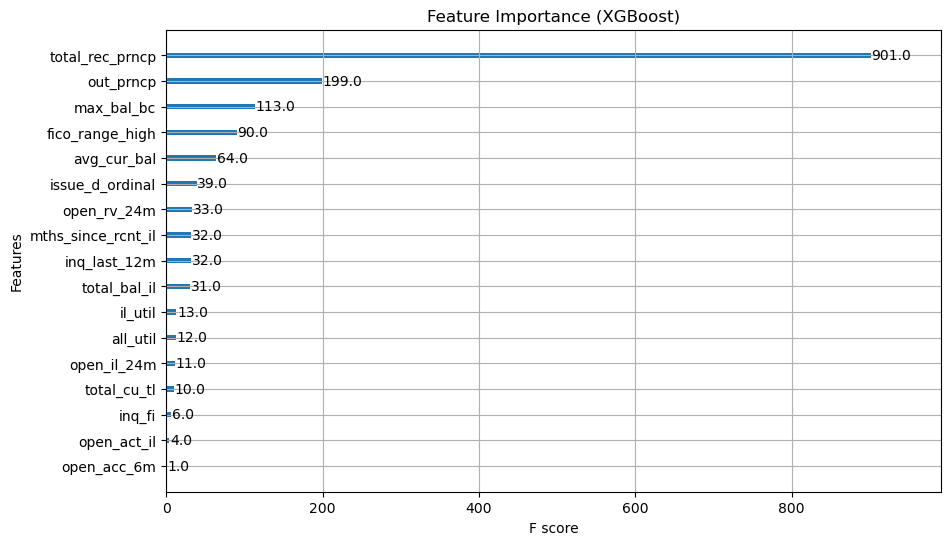

In [4]:
# Feature Importance
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type="weight", ax=ax)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [5]:
# Get feature importance scores
feature_importance = xgb_model.get_booster().get_score(importance_type="weight")

# Convert to DataFrame for better readability
importance_df = pd.DataFrame(
    feature_importance.items(),
    columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
2,total_rec_prncp,901.0
1,out_prncp,199.0
9,max_bal_bc,113.0
3,fico_range_high,90.0
0,avg_cur_bal,64.0
4,issue_d_ordinal,39.0
10,open_rv_24m,33.0
5,inq_last_12m,32.0
12,mths_since_rcnt_il,32.0
11,total_bal_il,31.0


# Try different loss functions

[0]	validation_0-auc:0.90958	validation_1-auc:0.91340
[1]	validation_0-auc:0.91504	validation_1-auc:0.91816
[2]	validation_0-auc:0.91145	validation_1-auc:0.91261
[3]	validation_0-auc:0.90846	validation_1-auc:0.90901
[4]	validation_0-auc:0.91410	validation_1-auc:0.91694
[5]	validation_0-auc:0.91799	validation_1-auc:0.92108
[6]	validation_0-auc:0.91889	validation_1-auc:0.92196
[7]	validation_0-auc:0.91897	validation_1-auc:0.92179
[8]	validation_0-auc:0.91831	validation_1-auc:0.92127
[9]	validation_0-auc:0.91850	validation_1-auc:0.92105
[10]	validation_0-auc:0.91941	validation_1-auc:0.92213
[11]	validation_0-auc:0.91998	validation_1-auc:0.92270
[12]	validation_0-auc:0.92046	validation_1-auc:0.92318
[13]	validation_0-auc:0.92087	validation_1-auc:0.92334
[14]	validation_0-auc:0.92105	validation_1-auc:0.92356
[15]	validation_0-auc:0.92124	validation_1-auc:0.92380
[16]	validation_0-auc:0.92153	validation_1-auc:0.92405
[17]	validation_0-auc:0.92148	validation_1-auc:0.92428
[18]	validation_0-au

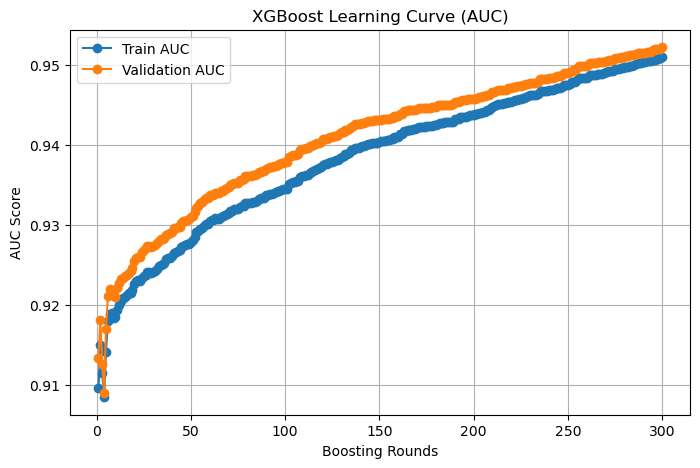

In [7]:
import matplotlib.pyplot as plt

# Define the model
xgb_model1 = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    learning_rate=0.05,
    n_estimators=300,  
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    #reg_lambda=10.0, 
    reg_alpha=5.0, #L1
    enable_categorical=False,  # Prevent issues with categorical data
    random_state=42
)

# Dictionary to store evaluation results
evals_result = {} 

# Train the model with early stopping
xgb_model1.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Monitor both train & val
    verbose=True
)

# Get evaluation results after training
evals_result = xgb_model1.evals_result()

print("Model training complete.")

# Extract learning curves
train_auc = evals_result['validation_0']['auc']
val_auc = evals_result['validation_1']['auc']
epochs = range(1, len(train_auc) + 1)

# Plot Learning Curve
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_auc, label="Train AUC", marker="o")
plt.plot(epochs, val_auc, label="Validation AUC", marker="o")
plt.xlabel("Boosting Rounds")
plt.ylabel("AUC Score")
plt.title("XGBoost Learning Curve (AUC)")
plt.legend()
plt.grid()
plt.show()
